## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [0]:
%tensorflow_version 2.x
import numpy as np
import pandas as pd
import tensorflow as tf
from tqdm import tqdm
from zipfile import ZipFile
from os.path import join, exists, expanduser
from google.colab import drive
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import cv2
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = "./drive/My Drive/AIML/cnn/project/"
print(project_path)

./drive/My Drive/AIML/cnn/project/


Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'train.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'test.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'sample_submission.csv.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'labels.csv.zip', 'r') as z:
  z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [0]:
import pandas as pd
df_labels = pd.read_csv("labels.csv")
df_labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


### Print the count of each category of Dogs given in the dataset



In [0]:
df_labels.groupby('breed').count()

,id
breed,
affenpinscher,80
afghan_hound,116
african_hunting_dog,86
airedale,107
american_staffordshire_terrier,74
...,...
welsh_springer_spaniel,79
west_highland_white_terrier,81
whippet,95


In [0]:
print(df_labels.dtypes)
print("====================")
print(df_labels.shape)


id       object
breed    object
dtype: object
(10222, 2)


### Get one-hot encodings of labels

### Note : One Hot encoding is done below

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
rows = 128
cols = 128
channels = 3

In [0]:
from tqdm import tqdm
import cv2

X_train = []
y_train = []

for id, breed in tqdm(df_labels.values): 
	train_img = cv2.imread('/content/train/{}.jpg'.format(id),1)
	train_img_resize = cv2.resize(train_img, (rows, cols))
	X_train.append(train_img_resize)
	y_train.append(breed)
	

100%|██████████| 10222/10222 [00:26<00:00, 383.98it/s]


In [0]:
print(len(X_train))
print(len(y_train))

10222
10222


Breed is :  boston_bull


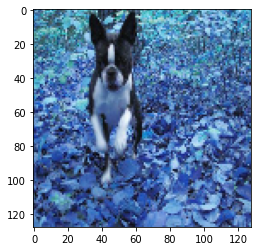

In [0]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])
print("Breed is : ", y_train[0])

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [0]:
import pandas as pd
dum = pd.get_dummies(y_train)

In [0]:
print(dum.shape)
print("=========================")
dum.head()

(10222, 120)


,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,english_foxhound,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
encoded_labels = dum
y_train = dum

In [0]:
import numpy as np
y_train = np.array(y_train)
X_train = np.array(X_train)

In [0]:
print(X_train.shape)
print(y_train.shape)


(10222, 128, 128, 3)
(10222, 120)


In [0]:
from sklearn.model_selection import train_test_split
x_train2, x_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2)
print (len(x_train2))
print (len(x_val))

8177
2045


In [0]:
x_train2 = x_train2.reshape(x_train2.shape[0],128,128,3)
x_val = x_val.reshape(x_val.shape[0],128,128,3)

In [0]:
x_train2 = x_train2/255.
x_val = x_val/255.
print (x_train2.shape)
print (x_val.shape)

(8177, 128, 128, 3)
(2045, 128, 128, 3)


In [0]:
print(y_train2.shape)
print(y_val.shape)

(8177, 120)
(2045, 120)


### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

### Note: split is done previous section


### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [0]:
df_samples = pd.read_csv("sample_submission.csv")
df_samples.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333

In [0]:
df_samples.shape

(10357, 121)

In [0]:
test_img = df_samples['id']
test_img.head

<bound method NDFrame.head of 0        000621fb3cbb32d8935728e48679680e
1        00102ee9d8eb90812350685311fe5890
2        0012a730dfa437f5f3613fb75efcd4ce
3        001510bc8570bbeee98c8d80c8a95ec1
4        001a5f3114548acdefa3d4da05474c2e
                       ...               
10352    ffeda8623d4eee33c6d1156a2ecbfcf8
10353    fff1ec9e6e413275984966f745a313b0
10354    fff74b59b758bbbf13a5793182a9bbe4
10355    fff7d50d848e8014ac1e9172dc6762a3
10356    fffbff22c1f51e3dc80c4bf04089545b
Name: id, Length: 10357, dtype: object>

Run the below code to load the test image files in x_test_feature

In [0]:
x_test_feature = []
i = 0 # initialisation
for f in tqdm(test_img.values): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 1)
    img_resize = cv2.resize(img, (rows, cols)) 
    x_test_feature.append(img_resize)

100%|██████████| 10357/10357 [00:26<00:00, 390.50it/s]


Normalize the test data and convert it into 4 dimensions

In [0]:
X_test = np.array(x_test_feature)
print(X_test.shape)
print(X_test.shape[0])
X_test = X_test.reshape(X_test.shape[0],128,128,3)
X_test = X_test/255
print(X_test.shape)

(10357, 128, 128, 3)
10357
(10357, 128, 128, 3)


### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

In [0]:
tf.keras.backend.clear_session()
#Initialize the model
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(64,kernel_size=(5,5), input_shape=(rows, cols, channels), activation='relu'))


#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add second convolutional layer
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))

#Flatten connected layers
model.add(tf.keras.layers.Flatten())
#First Dense layer
model.add(tf.keras.layers.Dense(256, activation='relu'))
#second dense layer
model.add(tf.keras.layers.Dense(120, activation='softmax'))

### Use batch_size = 128 and epochs = 10 and execute the model

In [0]:
BATCH_SIZE = 128
EPOCHS = 10

In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
# Train the model
model.fit(x_train2, y_train2, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(x_val, y_val))

Epoch 1/10
64/64 [==============================] - 8s 130ms/step - loss: 15.5642 - accuracy: 0.0121 - val_loss: 4.7873 - val_accuracy: 0.0142
Epoch 2/10
64/64 [==============================] - 8s 117ms/step - loss: 4.7562 - accuracy: 0.0216 - val_loss: 4.7864 - val_accuracy: 0.0142
Epoch 3/10
64/64 [==============================] - 7s 117ms/step - loss: 4.5348 - accuracy: 0.0558 - val_loss: 4.7718 - val_accuracy: 0.0147
Epoch 4/10
64/64 [==============================] - 7s 117ms/step - loss: 3.6193 - accuracy: 0.1992 - val_loss: 4.7472 - val_accuracy: 0.0210
Epoch 5/10
64/64 [==============================] - 7s 117ms/step - loss: 1.6753 - accuracy: 0.6253 - val_loss: 5.3268 - val_accuracy: 0.0220
Epoch 6/10
64/64 [==============================] - 7s 117ms/step - loss: 0.2676 - accuracy: 0.9525 - val_loss: 8.3088 - val_accuracy: 0.0215
Epoch 7/10
64/64 [==============================] - 7s 117ms/step - loss: 0.0469 - accuracy: 0.9958 - val_loss: 8.6147 - val_accuracy: 0.0230
Epoch

In [0]:
  loss, accuracy = model.evaluate(x_val, y_val)
  print("val loss = ",loss)
  print("val accuracy", accuracy)

64/64 [==============================] - 1s 11ms/step - loss: 7.9959 - accuracy: 0.0284
val loss =  7.995911598205566
val accuracy 0.028361858800053596


#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)  # randomly flip images

# Prepare the generator
datagen.fit(x_train2)

Using TensorFlow backend.


In [0]:
tf.keras.backend.clear_session()
#Initialize the model
model2 = tf.keras.models.Sequential()

# 2-conv-layer
model2.add(tf.keras.layers.Conv2D(64,kernel_size=(5,5), input_shape=(rows, cols, channels), activation='relu'))
#model.add(tf.keras.layers.Conv2D(64,kernel_size=(5,5), input_shape=(rows, cols, 1), activation='relu'))

#Normalize the data
model2.add(tf.keras.layers.BatchNormalization())

# 2-convolutional layer
model2.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))

#Flatten connected layers
model2.add(tf.keras.layers.Flatten())
#First Dense layer
model2.add(tf.keras.layers.Dense(256, activation='relu'))
#second dense layer
model2.add(tf.keras.layers.Dense(120, activation='softmax'))

In [0]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])



In [0]:
# Store Training Results
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=7, verbose=1, mode='auto')
callback_list = [early_stopping]



### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
train_generator = datagen.flow(x_train2, y_train2, batch_size=BATCH_SIZE)
val_generator = datagen.flow(x_val, y_val, batch_size=BATCH_SIZE)

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [0]:
model2.fit_generator(train_generator,
                   steps_per_epoch=128,
                   epochs=10,
                   validation_data=val_generator,
                   validation_steps=128,
                   callbacks=callback_list)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
128/128 [==============================] - 102s 796ms/step - loss: 9.9718 - accuracy: 0.0120 - val_loss: 4.7867 - val_accuracy: 0.0079
Epoch 2/10
128/128 [==============================] - 101s 789ms/step - loss: 4.7846 - accuracy: 0.0105 - val_loss: 4.7848 - val_accuracy: 0.0084
Epoch 3/10
128/128 [==============================] - 102s 795ms/step - loss: 4.7808 - accuracy: 0.0113 - val_loss: 4.7866 - val_accuracy: 0.0086
Epoch 4/10
128/128 [==============================] - 101s 787ms/step - loss: 4.7691 - accuracy: 0.0157 - val_loss: 4.7602 - val_accuracy: 0.0128
Epoch 5/10
128/128 [==============================] - 101s 790ms/step - loss: 4.7004 - accuracy: 0.0182 - val_loss: 4.6905 - val_accuracy: 0.0164
Epoch 6/10
128/128 [==============================] - 101s 790ms/step - loss: 4.6473 - accuracy: 0.0219 - val_loss: 4.6720 - val_accuracy: 0.0179
Epoch 7/10
128/128 [============================

In [0]:
  loss, accuracy = model2.evaluate(x_val, y_val)
  print("val loss = ",loss)
  print("val accuracy", accuracy)

64/64 [==============================] - 1s 10ms/step - loss: 4.6618 - accuracy: 0.0215
val loss =  4.661844253540039
val accuracy 0.021515892818570137


# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
print(project_path)

./drive/My Drive/AIML/cnn/project/


In [0]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
#base_model= VGG16(weights=(project_path+'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),include_top=False, pooling='avg')
base_model= VGG16(weights=('./drive/My Drive/AIML/cnn/project/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),include_top=False, pooling='avg')

Print the summary of the base_model

In [0]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [0]:
#Freezing the base_model(VGG16) layers to be non-trainable. Opening the last CNN layer as trainable (to improve the accuracy)
base_model.get_layer('block1_conv1').trainable = False
base_model.get_layer('block1_conv2').trainable = False
base_model.get_layer('block2_conv1').trainable = False
base_model.get_layer('block2_conv2').trainable = False
base_model.get_layer('block3_conv1').trainable = False
base_model.get_layer('block3_conv2').trainable = False
base_model.get_layer('block3_conv3').trainable = False
base_model.get_layer('block4_conv1').trainable = False
base_model.get_layer('block4_conv2').trainable = False
base_model.get_layer('block4_conv3').trainable = False
base_model.get_layer('block5_conv1').trainable = False
base_model.get_layer('block5_conv2').trainable = False
base_model.get_layer('block5_conv3').trainable = True

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
# Clear the session before building the model
tf.keras.backend.clear_session()

#Create a new model
model_new = tf.keras.models.Sequential()

In [0]:
#Add the base VGG model
model_new.add(base_model)

In [0]:
#Flatten the output
model_new.add(tf.keras.layers.Flatten())

#First Dense layer
model_new.add(tf.keras.layers.Dense(2048, kernel_initializer='he_normal', use_bias=True, activation='relu',name='dense_1'))
#model_new.add(tf.keras.layers.Dropout(0.2))

#Second Dense layer
model_new.add(tf.keras.layers.Dense(1024, kernel_initializer='he_normal', use_bias=True, activation='relu',name='dense_2'))
#model_new.add(tf.keras.layers.Dropout(0.2))
#Third Dense layer
model_new.add(tf.keras.layers.Dense(120, activation='softmax',name='prediction'))

In [0]:
model_new.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              1050624   
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
prediction (Dense)           (None, 120)               123000    
Total params: 17,986,488
Trainable params: 5,631,608
Non-trainable params: 12,354,880
_________________________________________________________________


### Make all the layers in the base_model (VGG16) to be non-trainable

### **Note: This is done above**

In [0]:
for layer in model_new.layers:
    if("dense_1" in layer.name):
        print(layer.name)
        layer.trainable = True
    if("dense_2" in layer.name):
        print(layer.name)
        layer.trainable = True
    if("prediction" in layer.name):
        print(layer.name)
        layer.trainable = True

dense_1
dense_2
prediction


### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [0]:
model_new.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              1050624   
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
prediction (Dense)           (None, 120)               123000    
Total params: 17,986,488
Trainable params: 5,631,608
Non-trainable params: 12,354,880
_________________________________________________________________


In [0]:
BATCH_SIZE = 128
EPOCHS = 10

In [0]:
rmsprop = optimizers.RMSprop(lr=0.001, rho=0.9, momentum=0.0)
#model_new.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
model_new.compile(optimizer=rmsprop,loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
# Train the model
model_new.fit(x_train2, y_train2, batch_size=BATCH_SIZE, epochs=EPOCHS, 
              validation_data=(x_val, y_val))

Epoch 1/10
64/64 [==============================] - 10s 156ms/step - loss: 4.9504 - accuracy: 0.0364 - val_loss: 4.1679 - val_accuracy: 0.0616
Epoch 2/10
64/64 [==============================] - 8s 127ms/step - loss: 3.7918 - accuracy: 0.1183 - val_loss: 3.5491 - val_accuracy: 0.1550
Epoch 3/10
64/64 [==============================] - 8s 130ms/step - loss: 3.2025 - accuracy: 0.2124 - val_loss: 3.4754 - val_accuracy: 0.1770
Epoch 4/10
64/64 [==============================] - 8s 132ms/step - loss: 2.8100 - accuracy: 0.2868 - val_loss: 3.1034 - val_accuracy: 0.2254
Epoch 5/10
64/64 [==============================] - 8s 132ms/step - loss: 2.4261 - accuracy: 0.3653 - val_loss: 3.2436 - val_accuracy: 0.2166
Epoch 6/10
64/64 [==============================] - 8s 133ms/step - loss: 2.0357 - accuracy: 0.4504 - val_loss: 3.0241 - val_accuracy: 0.2704
Epoch 7/10
64/64 [==============================] - 8s 132ms/step - loss: 1.6852 - accuracy: 0.5352 - val_loss: 3.3032 - val_accuracy: 0.2499
Epoch

In [0]:
  loss, accuracy = model_new.evaluate(x_val, y_val)
  print("val loss = ",loss)
  print("val accuracy", accuracy)

64/64 [==============================] - 2s 33ms/step - loss: 3.8707 - accuracy: 0.2719
val loss =  3.870720863342285
val accuracy 0.27188265323638916


In [0]:
y_predict = model_new.predict(X_test)
y_predict

array([[4.8807107e-07, 4.7397213e-03, 1.1260993e-04, ..., 5.1434810e-04,
        7.0968701e-05, 1.7151102e-05],
       [5.0776434e-14, 7.8835891e-17, 3.2981746e-17, ..., 3.6848038e-12,
        9.6912183e-12, 1.0350467e-14],
       [9.9201598e-06, 1.4489316e-03, 3.3528759e-05, ..., 1.3942269e-02,
        3.1716998e-03, 3.9397441e-06],
       ...,
       [2.3824337e-05, 4.5984274e-05, 6.0754287e-06, ..., 3.4700823e-03,
        1.1313797e-04, 3.9037608e-04],
       [1.0836422e-06, 1.4868137e-05, 5.7194617e-11, ..., 1.0153411e-09,
        9.7428754e-05, 1.3115311e-04],
       [1.0369172e-05, 8.6939661e-05, 5.8978185e-06, ..., 5.9381071e-03,
        3.2657193e-04, 1.3556737e-05]], dtype=float32)